# **Exploratory Data Analysis on Mall Customer Segmentation Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
# Load the data
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Annual Income:**

Customers are mostly in the income range of 30k–70k.

Income is not directly related to spending score, showing a diverse spending behavior.

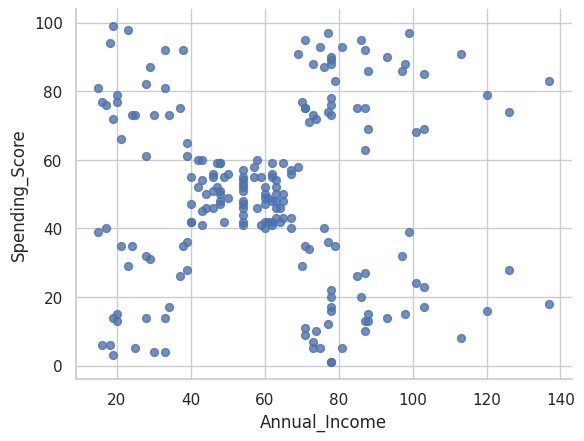

In [12]:
# Annual_Income vs Spending_Score

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual_Income', y='Spending_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# Shape and structure
print("Shape of dataset:", df.shape)
df.info()
df.describe()


Shape of dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
# For easier coding
df.rename(columns={
    'CustomerID': 'ID',
    'Genre': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)


Text(0.5, 1.0, 'Spending Score Distribution')

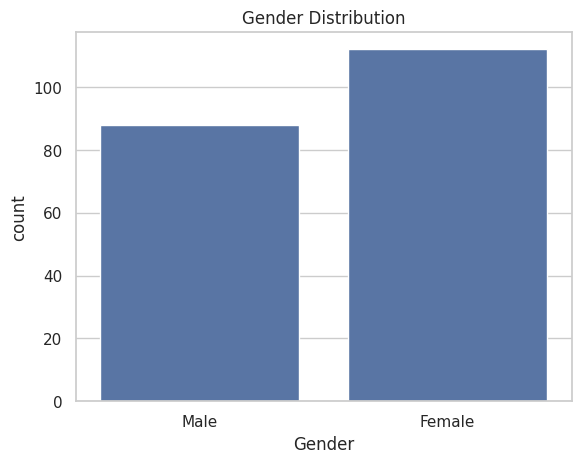

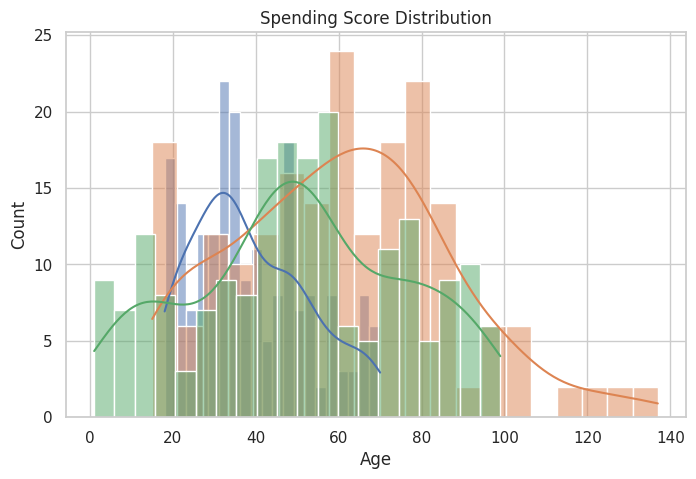

In [6]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

# Annual Income
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title("Annual Income Distribution")

# Spending Score
sns.histplot(df['Spending_Score'], bins=20, kde=True)
plt.title("Spending Score Distribution")


**Gender Distribution:**

The number of female customers is slightly higher than male.

**Age Distribution:**

Most customers are between 20 and 40 years old.

Very few customers are older than 60.


<Axes: xlabel='Age', ylabel='Spending_Score'>

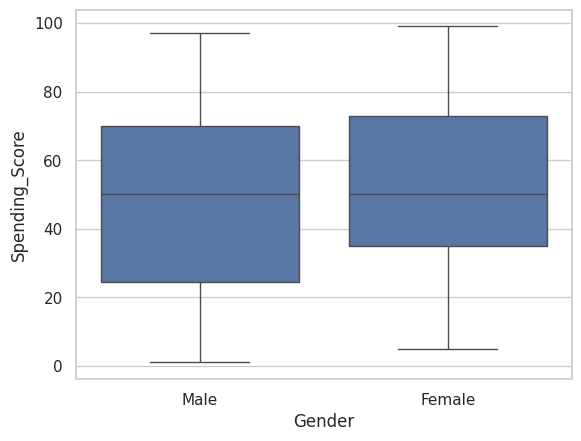

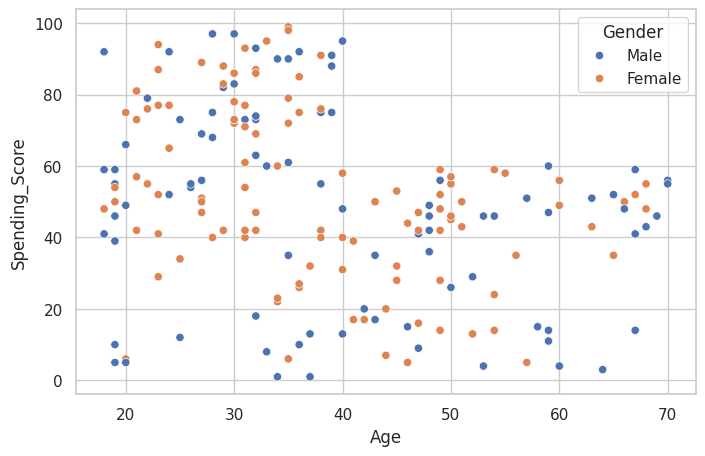

In [7]:
# Gender vs Spending Score
sns.boxplot(x='Gender', y='Spending_Score', data=df)

# Age vs Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Spending_Score', hue='Gender', data=df)


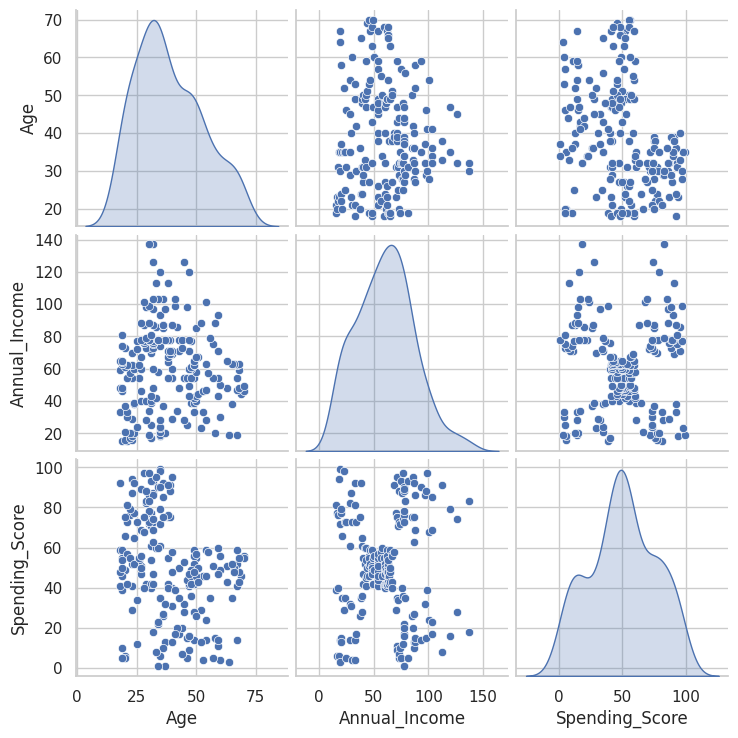

In [8]:
sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score']], diag_kind='kde')


**Spending Score:**

A group of young customers has high spending scores, indicating a target segment for promotions.

**Annual Income:**

Customers are mostly in the income range of 30k–70k.

Income is not directly related to spending score, showing a diverse spending behavior.

**Clustering Opportunity:**

There is a visible pattern when plotting Annual Income vs Spending Score—useful for customer segmentation or targeting.

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

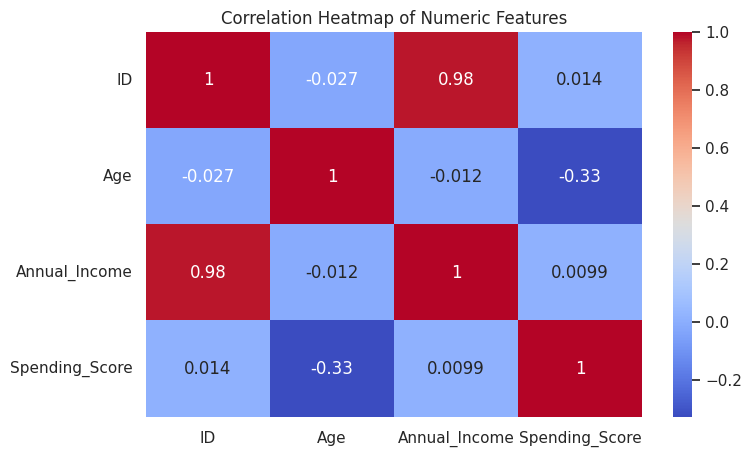

In [10]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")


**Age vs Spending Score:**

 Slightly negative correlation→ Older customers tend to spend less.



**Annual Income vs Spending Score:**

Near zero correlation → Customers with higher income do not necessarily spend more, indicating varied spending habits.



**Age vs Annual Income:**

Very low correlation → No strong relationship between age and income in this dataset.


***Insight: Income isn't a strong predictor of spending, and customer segmentation cannot rely on income alone.***

Text(0.5, 1.0, 'Annual Income vs Spending Score')

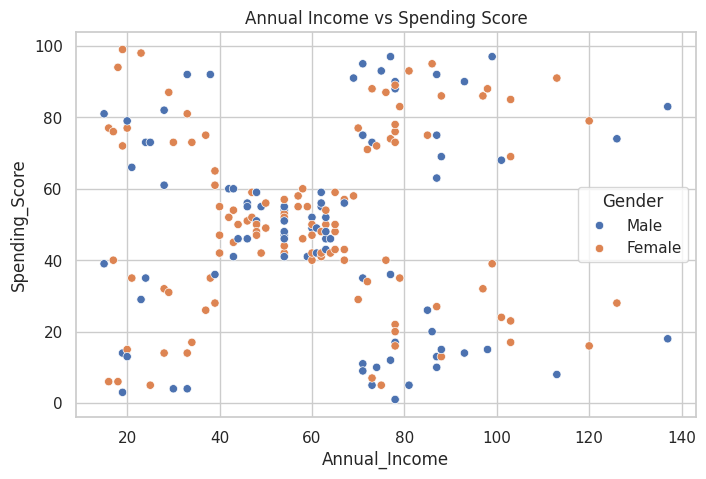

In [11]:
#  visualize customer segments
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.title('Annual Income vs Spending Score')


The data forms distinct clusters, such as:

-> High income, low spending

-> Low income, high spending

-> Mid income, mid spending



This suggests that the customer base can be grouped into segments, such as:

-> Frugal High Earners (high income but low spending)

-> Potential Premium Buyers (high income, high spending)

-> Budget Shoppers (low income, low spending)

-> Young Spenders (moderate income, high spending)

Both males and females are spread across clusters fairly evenly, though spending patterns may slightly differ.

**This scatter plot is often a starting point for K-Means clustering to formally segment customers.**

